# Splotify Tutorial and Examples

View this Jupyter Notebook on Colab with the interactive Plotly plots [here](https://colab.research.google.com/drive/14jXAa_LertvDA4oHT148vWpNIDBiYZ5O?usp=sharing).

## Setup

### Install Splotify:

In [ ]:
!pip install splotify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Getting Spotify Authorization

To use Splotify you must first get your `SPOTIPY_CLIENT_ID`, `SPOTIPY_CLIENT_SECRET`, and redirect uri. Navigate to your [Spotify devloper dashboard](https://developer.spotify.com/dashboard), log in with your Spotify account, and create your own app. [Here](https://www.youtube.com/watch?v=3RGm4jALukM) is a tutorial created by Spotipy that explains how to do so.

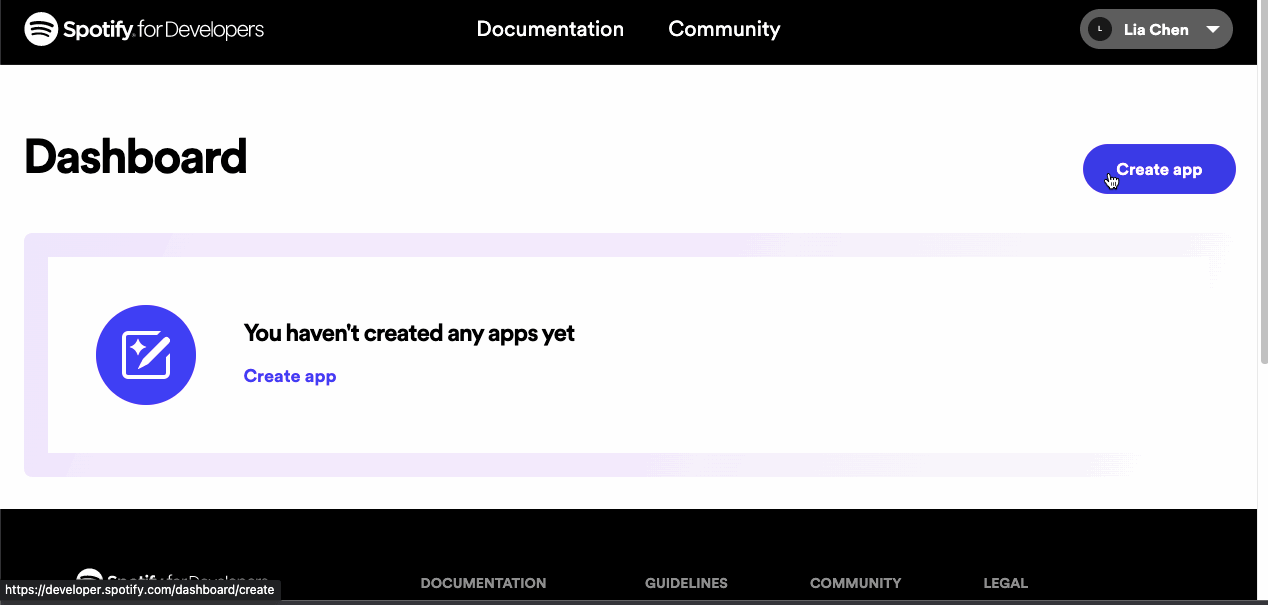

In [ ]:
import splotify.spotifyapi as spotifyapi
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# replace these fields with your own client id, client secret, and redirect URI
sp = spotifyapi.SpotifyApi(
    "YOUR SPOTIPY_CLIENT_ID",
    "YOUR SPOTIPY_CLIENT_SECRET",
    "YOUR REDIRECT URI",
)

# include this for browserless environments 
sp.sp = spotipy.Spotify(
            auth_manager=SpotifyOAuth(scope=scope, open_browser=False)
        )

## Find and add tracks to plot

### Look up Spotify URIs

In [ ]:
import splotify.helpers as helpers

# look up the id of a song called "All These Things That I've Done"
ids = helpers.search_id(sp, "All These Things That I've Done", limit=1)

# look up the ids of 5 Tchaikovsky Violin Concerto recordings
ids = helpers.search_id(sp, "Tchaikovsky Violin Concerto", limit=5, type="track")

# look up the ids of 3 artists called The Sundays
ids = helpers.search_id(sp, "The Sundays", limit=3, type="artist")

# look up the ids of 5 Fall Out Boy albums
ids = helpers.search_id(sp, "Fall Out Boy", type="album")

# look up the ids of 15 Queen playlists
ids = helpers.search_id(sp, "queen", limit=15, type="playlist")

Name                             Album     Artists          URI
-------------------------------  --------  ---------------  ------------------------------------
All These Things That I've Done  Hot Fuss  ['The Killers']  spotify:track:5vollujufHY0jMZxx77VWr
Name                                                                               Album                                                 Artists                                                                                                   URI
---------------------------------------------------------------------------------  ----------------------------------------------------  --------------------------------------------------------------------------------------------------------  ------------------------------------
Violin Concerto In D Major, Op. 35, TH.59: I. Allegro moderato                     Higdon / Tchaikovsky: Violin Concertos                ['Pyotr Ilyich Tchaikovsky', 'Hilary Hahn', 'Royal Liverpool Philharmonic Orch

If you want to view the Spotify URIs of your personal playlists, use the `my_id()` function instead.

### Add the tracks you want to a Data object

In addition to using URIs, you can also use Spotify URLs and Spotify IDs. According to the Spotipy doccumentation [here](https://spotipy.readthedocs.io/en/2.22.1/#ids-uris-and-urls):


*   Spotify URI - The resource identifier that you can enter, for example, in the Spotify Desktop client’s search box to locate an artist, album, or track. Example: `spotify:track:6rqhFgbbKwnb9MLmUQDhG6`
*   Spotify URL - An HTML link that opens a track, album, app, playlist or other Spotify resource in a Spotify client. Example: `http://open.spotify.com/track/6rqhFgbbKwnb9MLmUQDhG6`
*   Spotify ID - A base-62 number that you can find at the end of the Spotify URI (see above) for an artist, track, album, etc. Example: `6rqhFgbbKwnb9MLmUQDhG6`

In [ ]:
import splotify.data as data

d = data.Data(sp)

# add "Changing of the Seasons" by Two Door Cinema using Spotify URLs
d.add_track("https://open.spotify.com/track/3mrlQc1K6sPmoBY1Pv46Ab?si=07b2e536c7f047a9")
# add "All These Things That I've Done" by The Killers and Hilary Hahn's recording of Tchaikovsky's violin concerto using Spotify IDs
d.add_tracks(["5vollujufHY0jMZxx77VWr", "5yyWkqPnm6pXSLmKXbW6dB"])

# add "Comic and Cosmic" by PinocchioP using Spotify URLs
d.add_album("https://open.spotify.com/album/3Ydz6UhhXxgsoj36DKSv9L?si=Cd6jjopmQZeb_niwjvACow")
# add "So Much (For) Stardust", "From Under The Cork Tree", and "Infinity On High" by Fall Out Boy using Spotify URIs
d.add_albums(["spotify:album:5mWnMYLnfcnkDOCojHW6O1", "spotify:album:5nkUSlIhtoJZMOUlB0sNCp","spotify:album:0hHopYqXhuvYSHtVyrcb1g"])

# add "This is Queen" playlist by Spotify using Spotify URIs
d.add_playlist("spotify:playlist:37i9dQZF1DZ06evO0ENBD2")
# add "This is Day6" and "This is Radiohead" playlists by Spotify using Spotify URLs
d.add_playlists(["https://open.spotify.com/playlist/37i9dQZF1DX3Ucx6LaTP5S?si=a8e21e0cc2284f4b", "https://open.spotify.com/playlist/37i9dQZF1DZ06evO2VxlyE?si=455ba91f17504c8f"])

## Plotting audio features

In [ ]:
import splotify.plots.audiofeatures as af

afp = af.AudioFeaturesPlot(sp, d, ["energy", "loudness"])

# plot a simple scatter plot of the data by their energy and loudness features
plt = afp.scatter_plot_2d()

### Expected output (2D scatter plots)

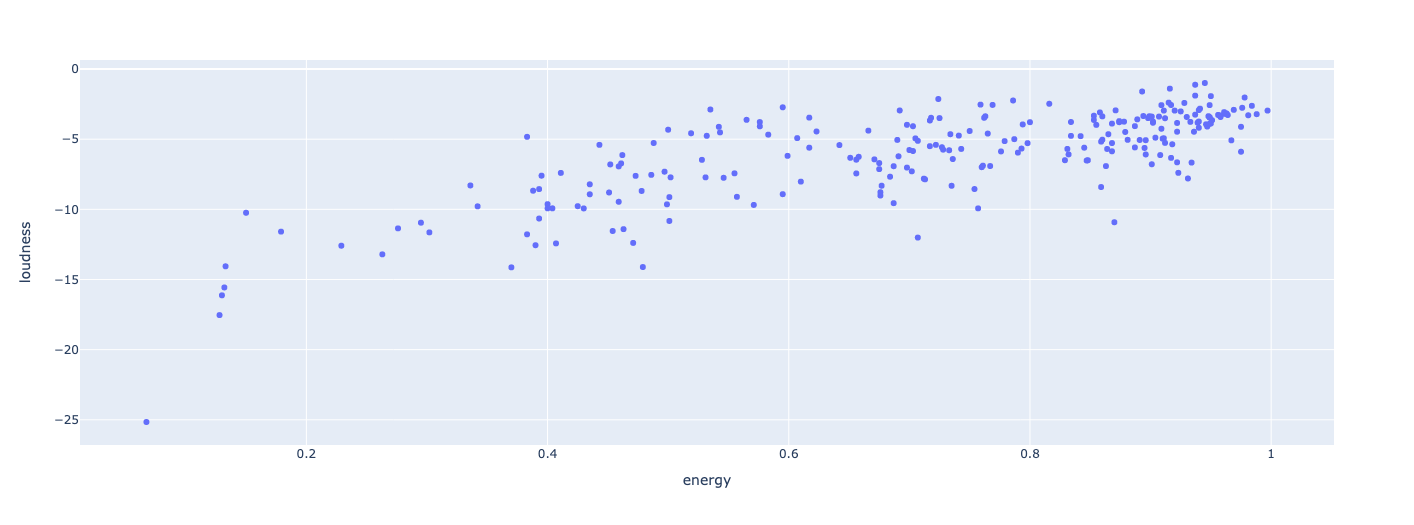

In [ ]:
# select danceability as a 3rd feature to plot by
afp.select_features(["energy", "loudness", "danceability"])

# plot a 3d scatter plot of the data, colored by their albums
plt = afp.scatter_plot_3d(color="album")

### Expected output (3D scatter plots)

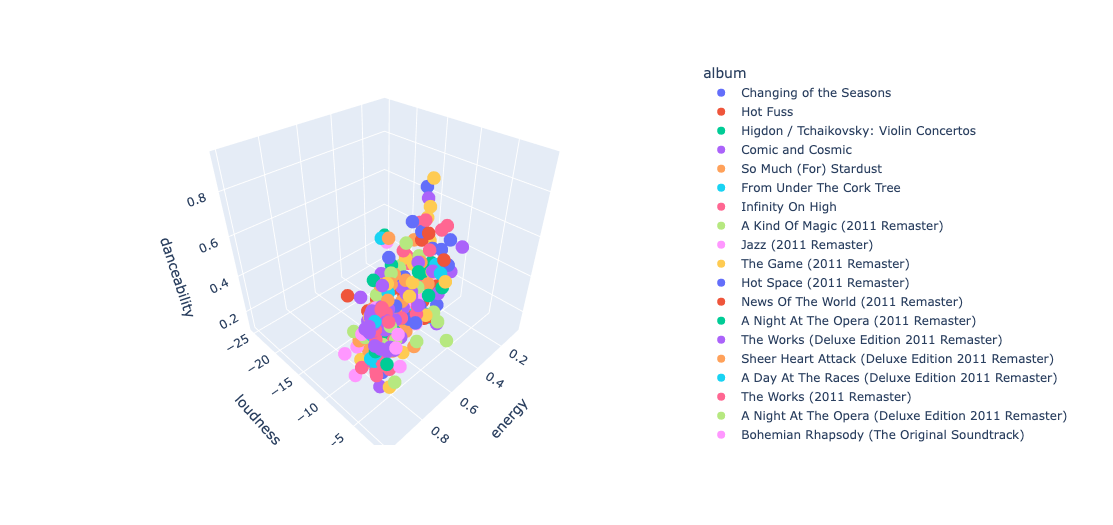

In [ ]:
# plot the average audio features of the tracks by artist
plt = afp.scatter_plot_2d_average(groupby="artist")
plt = afp.scatter_plot_3d_average(groupby="artist")

### Expected output (average scatter plots)

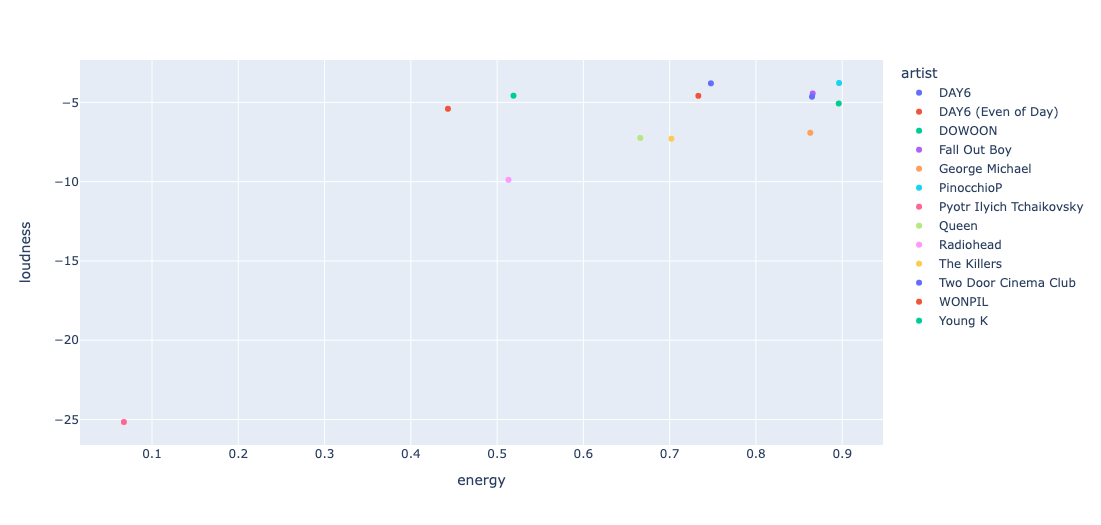

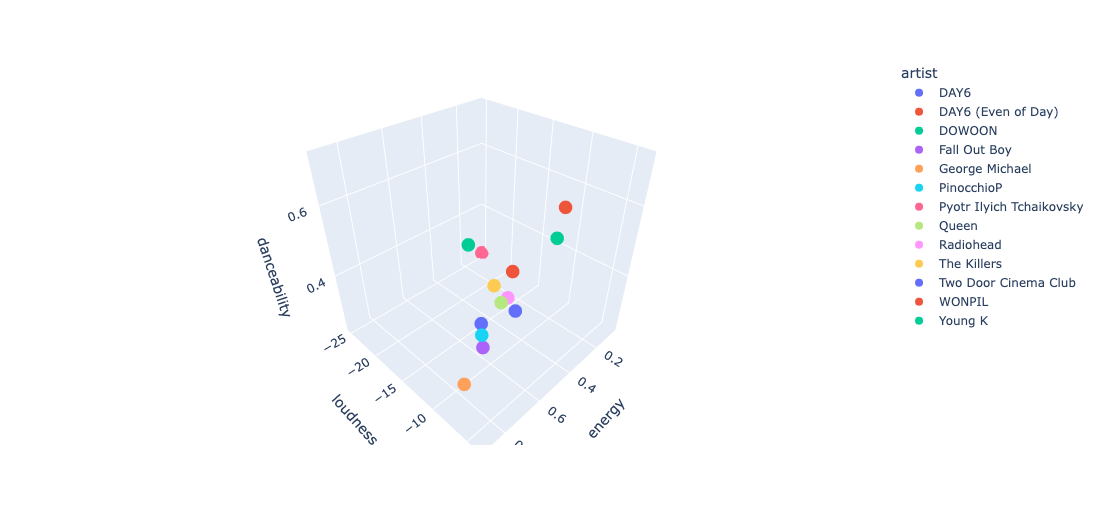

In [ ]:
# plot a histogram of the tracks' energy, both as a whole and by artist
plt = afp.histogram("energy")
plt = afp.histogram("energy", color="artist")

### Expected output (histograms)

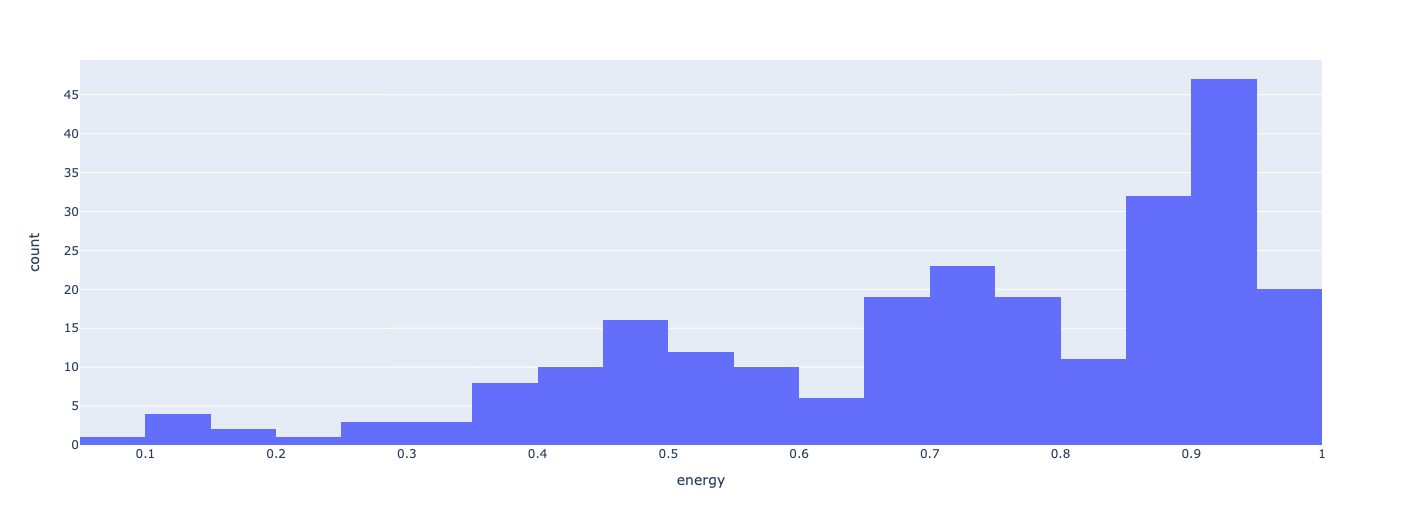

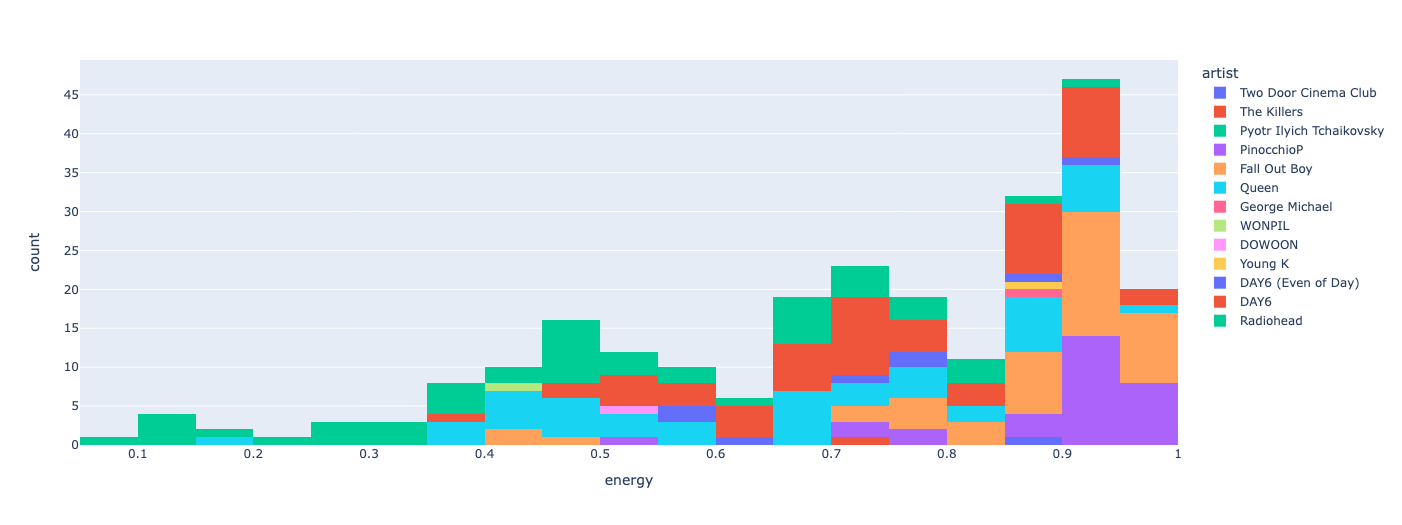

In [ ]:
plt = afp.box_plot("energy")
plt = afp.box_plot("energy", groupby="artist")

### Expected output (box plots)

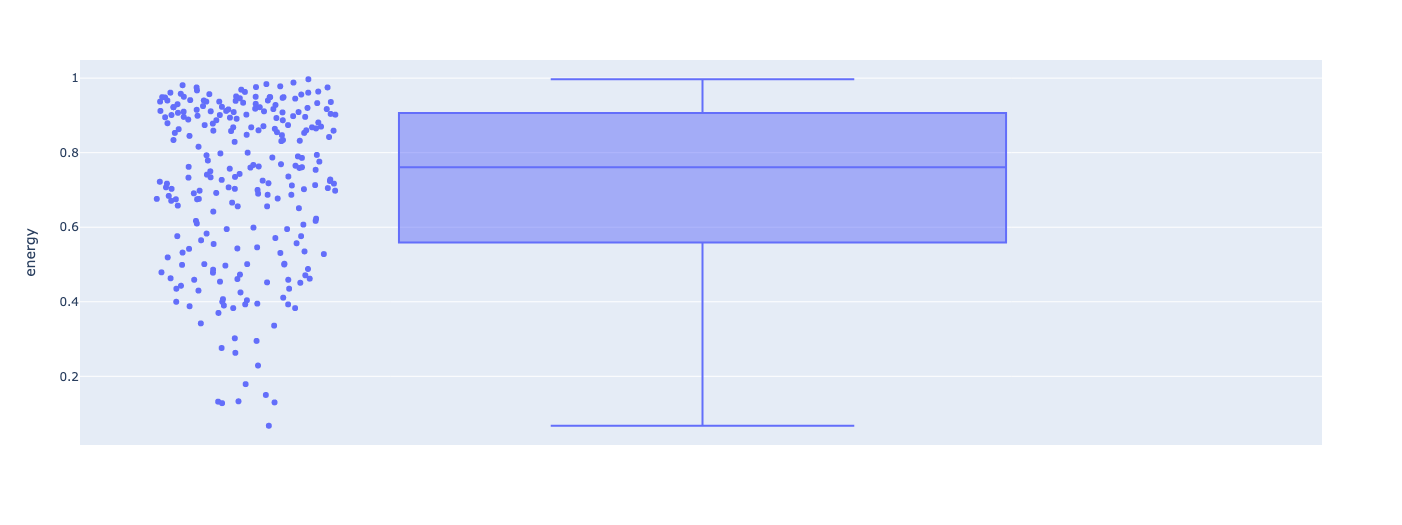

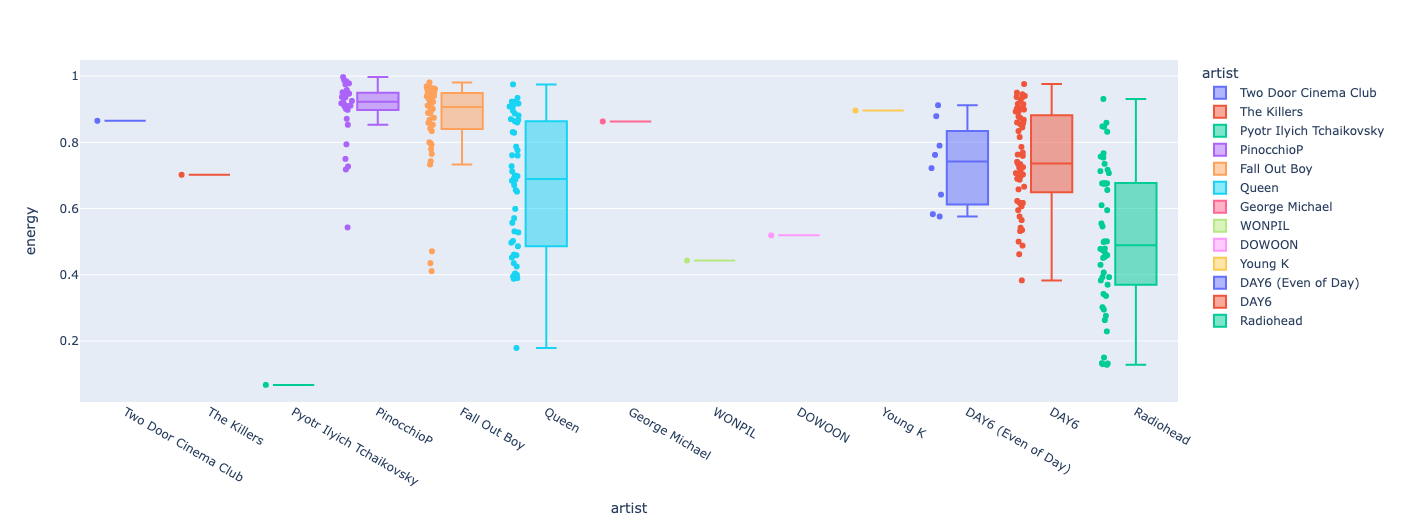

## Plotting categories

In [ ]:
import splotify.plots.category as c

cp = c.CategoryPlot(d)

plt = cp.bar_chart(groupby="artist")
plt = cp.pie_chart(groupby="artist")

### Expected output (category plots)

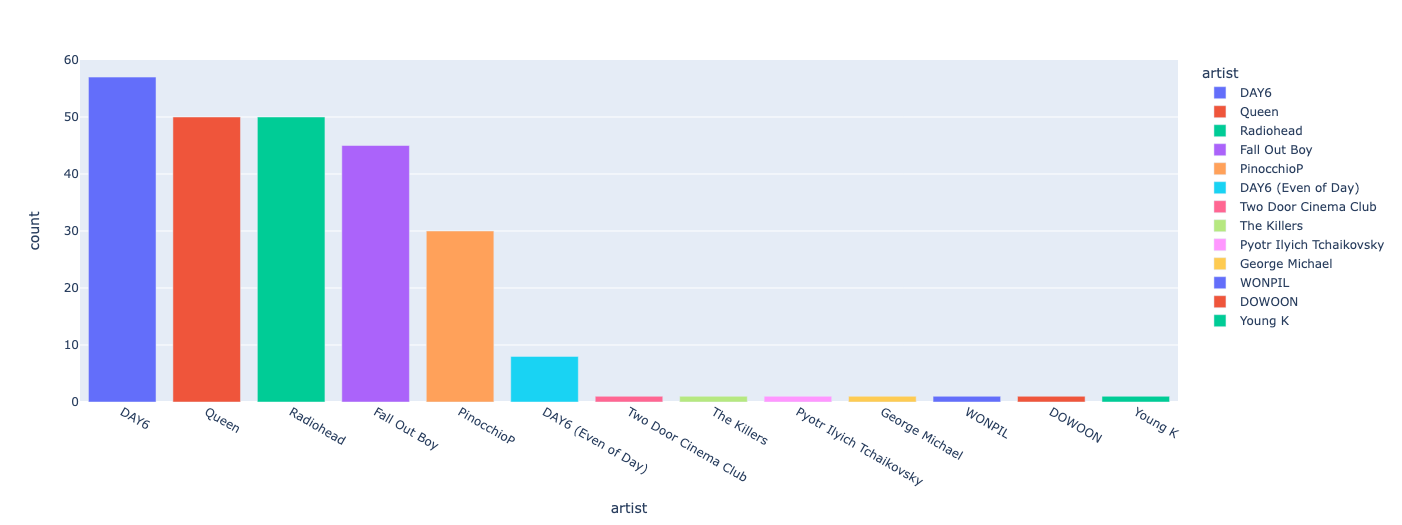

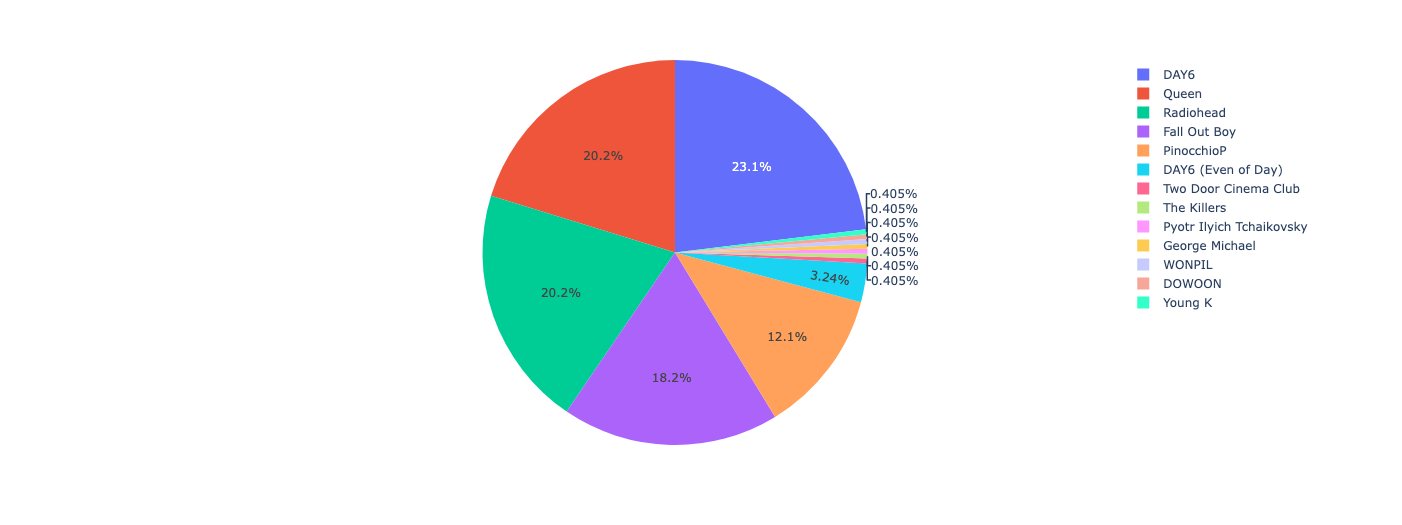